In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'calc_csat.py',
 'figures',
 'ML_model',
 'model_equations_separate_NC_store.py',
 'model_equations_separate_NC_store_numba.py',
 'Model_Parameters Store model.xlsx',
 'model_param_sensitivity_new_overflow.ipynb',
 'model_param_sensitivity_ponly.ipynb',
 'model_store_analyze_monte_curves.ipynb',
 'model_store_analyze_monte_params.ipynb',
 'model_store_analyze_monte_with_classes.ipynb',
 'model_store_analyze_vpro.ipynb',
 'model_store_cc debug.ipynb',
 'model_store_cc.ipynb',
 'model_store_ponly.ipynb',
 'model_store_ponly_find_lsq_x0.ipynb',
 'model_store_select_loss.ipynb',
 'reference_10cc.xlsx',
 'reference_10cc_axenic.xlsx',
 'reference_pro99_axenic.xlsx',
 'results',
 'results_postprocess.py',
 'run_compute_mce.py',
 'run_files',
 'run_least_squares_het.py',
 'run_least_squares_ponly.py',
 'run_monte.py',
 'run_shgo_ponly.py',
 'tmp',
 'ts_kmean_cluster',
 'VPRO',
 '__pycache__']

In [6]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx',)
refdf['ref_Bp[N]'] = refdf['ref_Bp[N]'].clip(lower=1)
refdf['ref_Bp[C]'] = refdf['ref_Bp[C]'].clip(lower=1)
refdf['log_ref_Bp[N]'] = np.log(refdf['ref_Bp[N]'])
refdf['log_ref_Bp[C]'] = np.log(refdf['ref_Bp[C]'])


In [43]:
model = 'MIN'
#model = 'OVERFLOW'
#model = 'EXOENZYME'
jsonl=[]
pro99_mode = False

which_organism = 'ponly'
maxday = 100
new_param_vals = get_param_vals_from_json_list(model, jsonl)
suffix = get_runid_unique_suffix(pro99_mode, which_organism, model, new_param_vals)
t_eval, t_end = get_t_eval_and_t_end(None, refdf, maxday)
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
    ) = get_constants_per_organism(pro99_mode, which_organism)
par_tuple = prepare_params_tuple(new_param_vals)


In [44]:
print_dydt0(calc_dydt, var_names, init_var_vals,par_tuple)


dBp/dt = -1.03e-06, init Bp = 8.93e-01, newval = 8.93e-01
dNp/dt = 2.25e-05, init Np = 0.00e+00, newval = 2.25e-05
dCp/dt = 1.22e-04, init Cp = 0.00e+00, newval = 1.22e-04
dDON/dt = 3.64e-07, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 2.07e-07, init RDON = 0.00e+00, newval = 2.07e-07
dDIN/dt = -2.20e-05, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = 5.48e-06, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 1.37e-06, init RDOC = 0.00e+00, newval = 1.37e-06
dDIC/dt = -1.22e-04, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = 0.00e+00, init ROS = 2.00e-01, newval = 2.00e-01


In [45]:
var_names

['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS']

In [46]:
init_var_vals

array([8.92857143e-01, 0.00000000e+00, 0.00000000e+00, 2.00000000e+01,
       0.00000000e+00, 1.00000000e+02, 1.32500000e+02, 0.00000000e+00,
       2.24155230e+03, 2.00000000e-01])

In [47]:
#sol = run_solver(calc_dydt, init_vars)
#sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))
MSE_err, new_param_vals, df, mse_df = run_solver_from_new_params(
    new_param_vals, refdf, 
    init_var_vals, 
    calc_dydt, prepare_params_tuple, t_end , t_eval, var_names, intermediate_names,return_dfs=True
)


In [48]:
df.head().T

,0,1,2,3,4
Bp,8.928571e-01,2.588919,9.928716,20.474818,7.025794e+01
Np,0.000000e+00,1.315792,5.061103,10.434085,2.227895e+01
Cp,0.000000e+00,7.588438,29.195003,60.201099,2.037657e+02
DON,2.000000e+01,20.140324,20.809947,21.810534,2.665271e+01
RDON,0.000000e+00,0.045927,0.224375,0.480711,1.703219e+00
DIN,1.000000e+02,96.801896,84.868716,67.692710,4.409810e-05
DOC,1.325000e+02,133.667542,138.189925,144.686550,1.760886e+02
RDOC,0.000000e+00,0.291886,1.422481,3.046638,1.089715e+01
DIC,2.241552e+03,2222.163594,2151.635255,2050.870436,1.578925e+03
ROS,2.000000e-01,0.200000,0.200000,0.200000,2.000000e-01


In [49]:
0.000061 - 0.000362 / 6.625000e+00

6.358490566037732e-06

In [50]:
QN = (0.000061 + 15.952641)  / (15.952641 * 6.625000e+00 + 0.000362)

In [51]:
(0.000061 - 0.000362 / 6.625000e+00) * np.exp( - (0.25 - QN) / (0.25 - 0.1))

3.285155737210766e-06

In [52]:
mse_df

,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],RMSE_log_Bptotal[N],RMSE_log_Bptotal[C],compare_points,RMSE,lRMSE
0,1A0,Axenic,Axenic,16.587664,166.069408,3.401248,2.508786,74.0,2754.703499,8.533002
1,1B0,Axenic,Axenic,16.625385,165.443490,3.442778,2.648748,74.0,2750.561731,9.119050
2,1C0,Axenic,Axenic,16.487392,165.271264,3.439813,2.627061,74.0,2724.892106,9.036597


In [53]:
mdf = df.melt(id_vars=['t', 'day'])

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

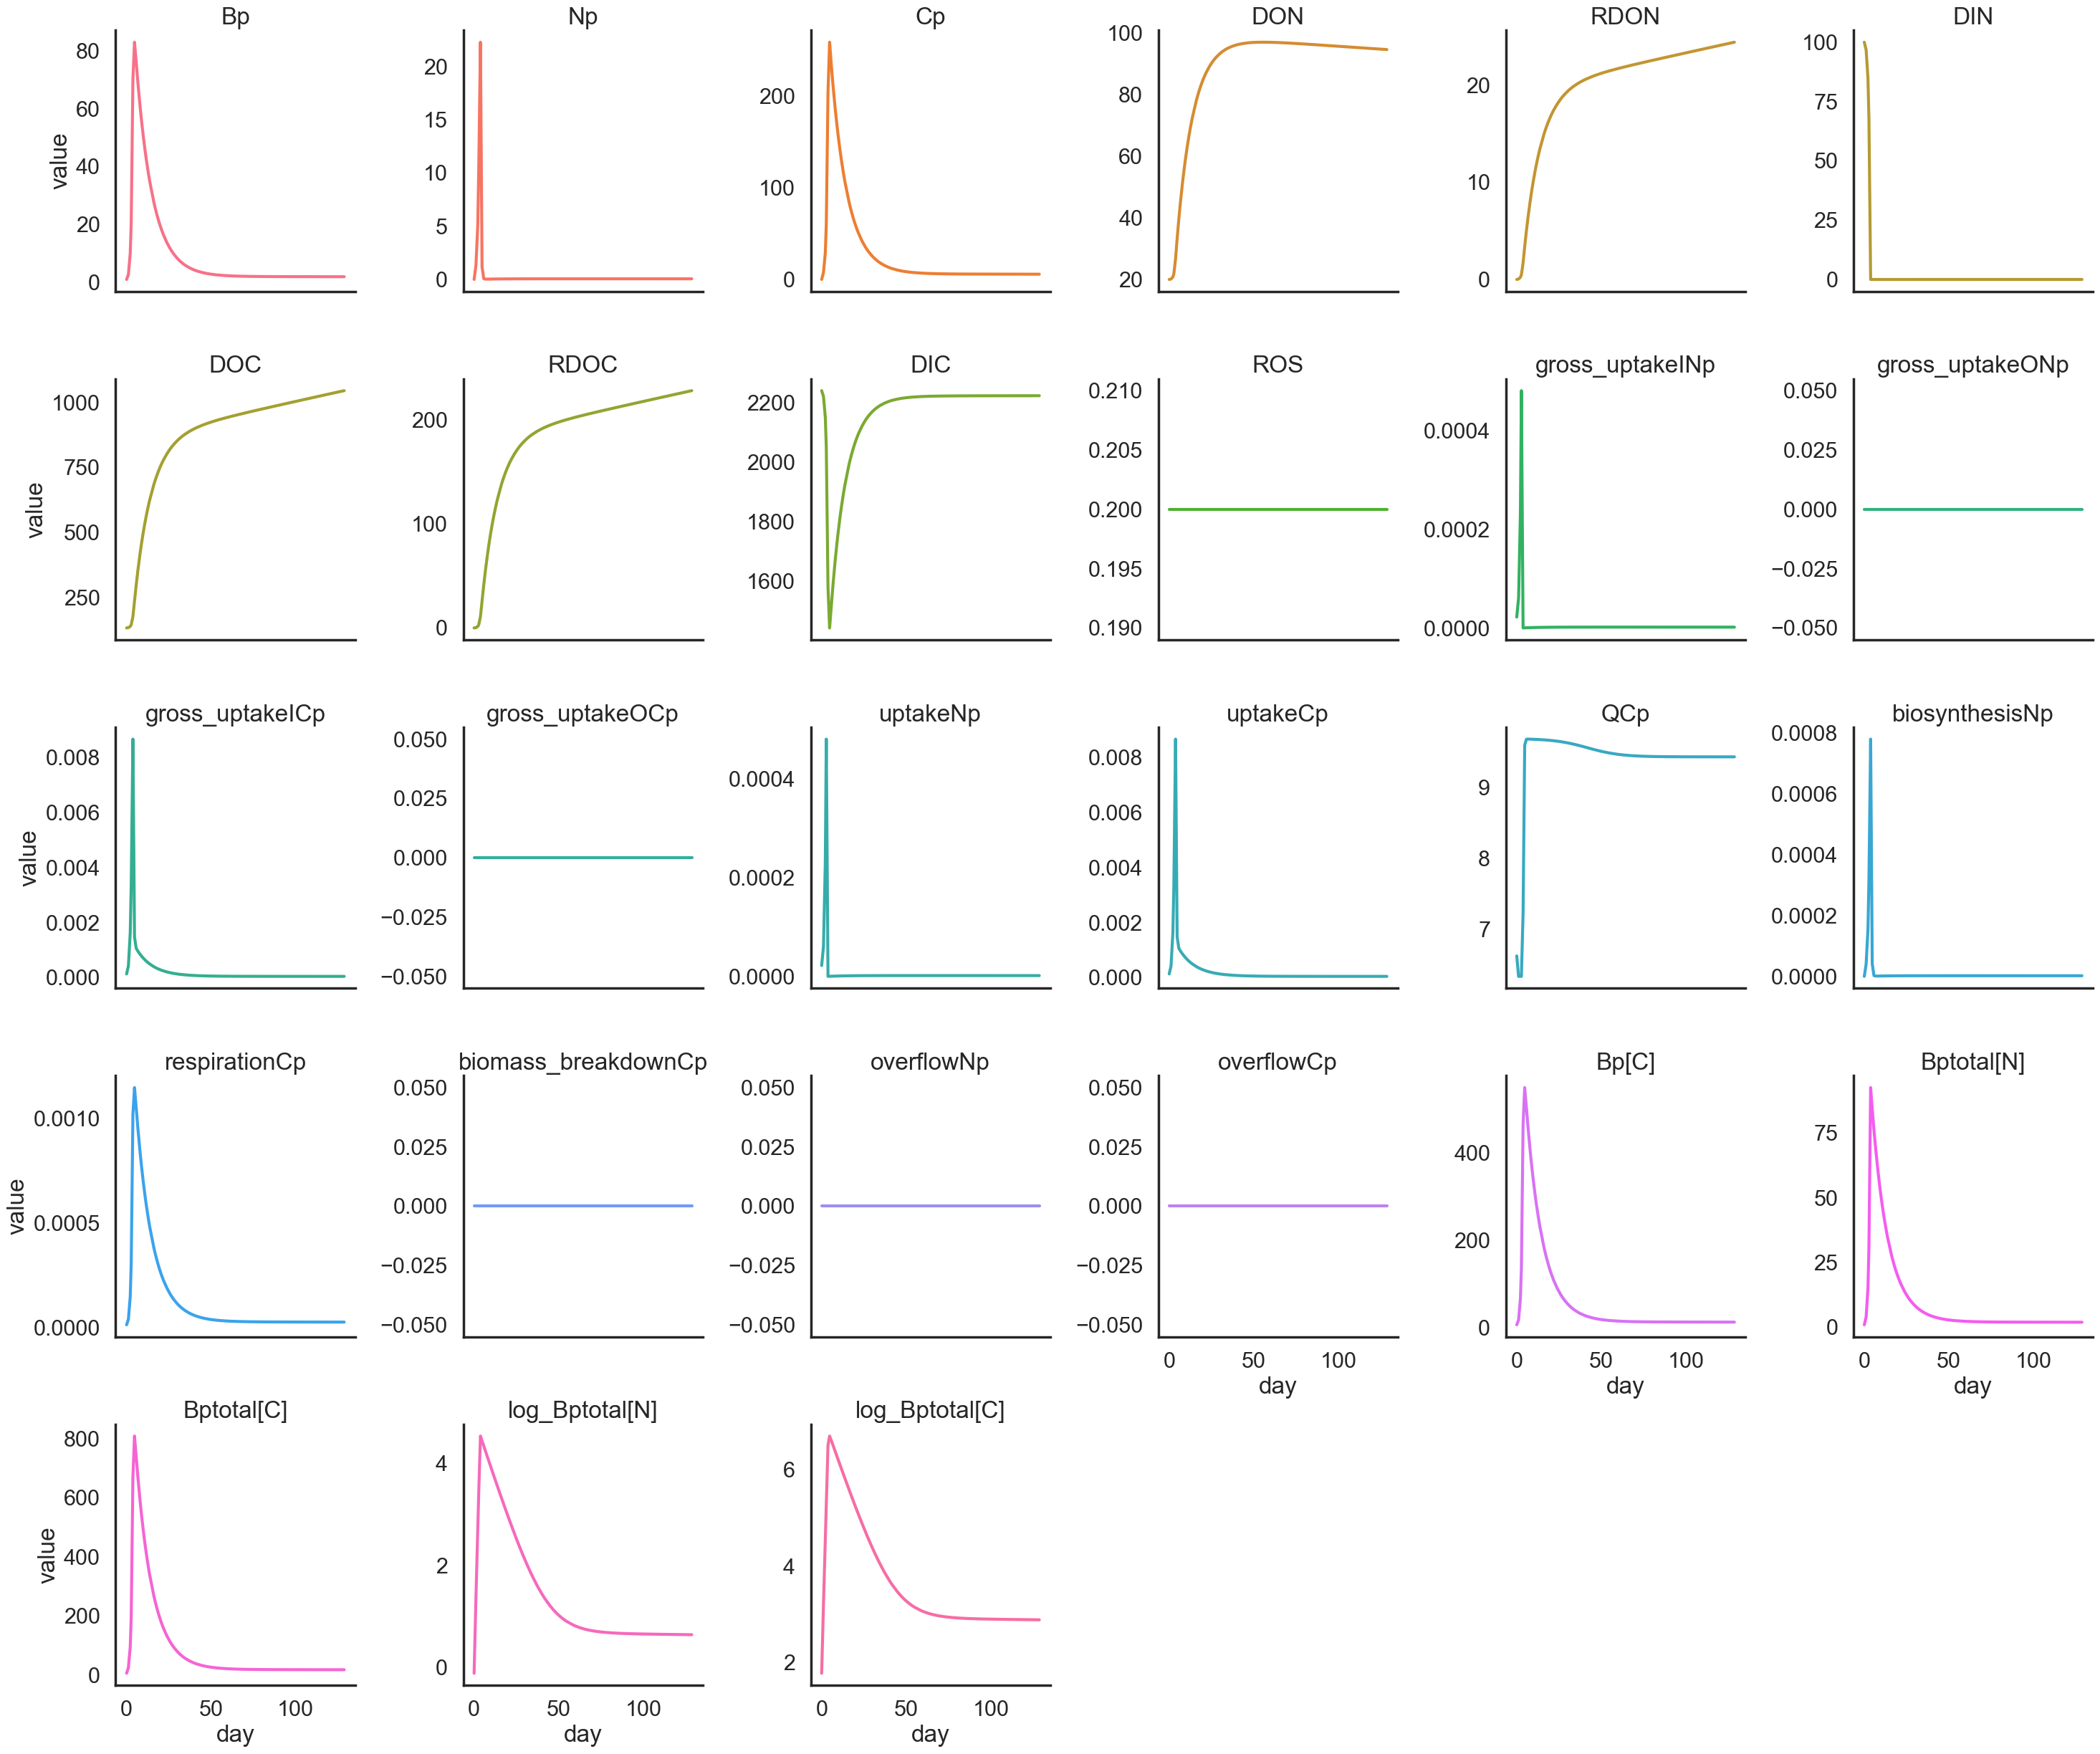

In [54]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

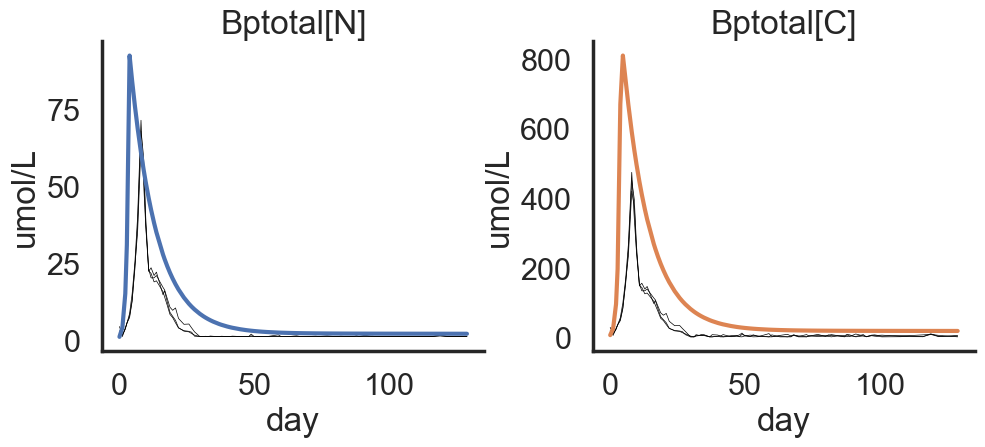

In [55]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Bptotal[N]', 'Bptotal[C]'])], x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}').set(ylabel='umol/L')
sns.lineplot(data=refdf, x='day', y='ref_Bp[N]',
            units='Sample', estimator=None,
            legend=False,
            ax=g.axes[0], color='black', zorder=1, lw=0.5,
           )
sns.lineplot(data=refdf, x='day', y='ref_Bp[C]',
            units='Sample', estimator=None,
            legend=False,
            ax=g.axes[1], color='black', zorder=1,lw=0.5,
           )
    
plt.show()

In [56]:
#refdf['ref_Bp[C]'] = refdf['ref_Bp'] * 7 

In [57]:
df.min()

Bp                     8.928571e-01
Np                     0.000000e+00
Cp                     0.000000e+00
DON                    2.000000e+01
RDON                   0.000000e+00
DIN                    3.563066e-05
DOC                    1.325000e+02
RDOC                   0.000000e+00
DIC                    1.442495e+03
ROS                    2.000000e-01
t                      0.000000e+00
day                    0.000000e+00
gross_uptakeINp        6.178836e-07
gross_uptakeONp        0.000000e+00
gross_uptakeICp        4.618820e-05
gross_uptakeOCp        0.000000e+00
uptakeNp               6.178836e-07
uptakeCp               4.618820e-05
QCp                    6.335817e+00
biosynthesisNp         7.100702e-10
respirationCp          1.232332e-05
biomass_breakdownCp    0.000000e+00
overflowNp             0.000000e+00
overflowCp             0.000000e+00
Bp[C]                  5.915179e+00
Bptotal[N]             8.928571e-01
Bptotal[C]             5.915179e+00
log_Bptotal[N]        -1.133

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

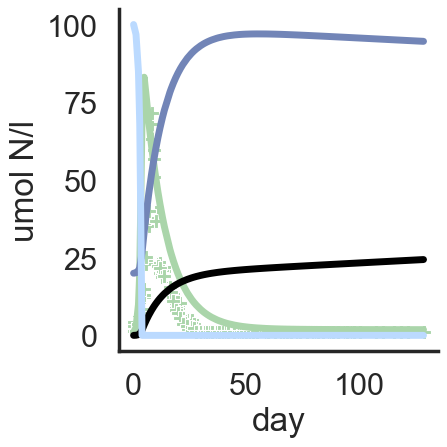

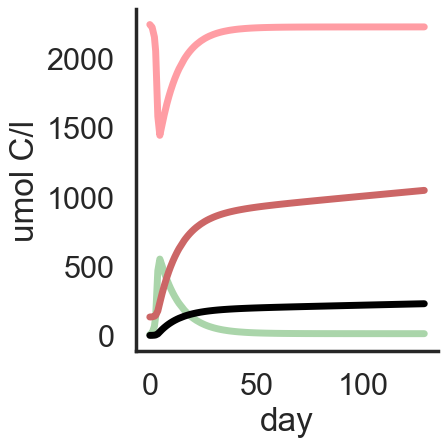

In [58]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol N/l')
sns.scatterplot(data=refdf, x='day', y='ref_Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol C/l')
#sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')



In [59]:
len(param_vals)

58

In [60]:
df.min()

Bp                     8.928571e-01
Np                     0.000000e+00
Cp                     0.000000e+00
DON                    2.000000e+01
RDON                   0.000000e+00
DIN                    3.563066e-05
DOC                    1.325000e+02
RDOC                   0.000000e+00
DIC                    1.442495e+03
ROS                    2.000000e-01
t                      0.000000e+00
day                    0.000000e+00
gross_uptakeINp        6.178836e-07
gross_uptakeONp        0.000000e+00
gross_uptakeICp        4.618820e-05
gross_uptakeOCp        0.000000e+00
uptakeNp               6.178836e-07
uptakeCp               4.618820e-05
QCp                    6.335817e+00
biosynthesisNp         7.100702e-10
respirationCp          1.232332e-05
biomass_breakdownCp    0.000000e+00
overflowNp             0.000000e+00
overflowCp             0.000000e+00
Bp[C]                  5.915179e+00
Bptotal[N]             8.928571e-01
Bptotal[C]             5.915179e+00
log_Bptotal[N]        -1.133